In [40]:
import torch
import numpy as np

In [41]:
batch_size=1000
a=0
b=1

In [42]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(1,45)
        self.fc2 = nn.Linear(45,45)
        self.fc3 = nn.Linear(45,25) 
        self.fc4 = nn.Linear(25,25)
        self.fc5 = nn.Linear(25,1)
        
        self.fc1d = nn.Linear(1,45)
        self.fc2d = nn.Linear(45,45) 
        self.fc4d = nn.Linear(45,25)
        self.fc5d = nn.Linear(25,1)
      


    def forward(self, x,dx):
        x = F.softplus(self.fc1(x))
        x = F.softplus(self.fc2(x))
        x = F.softplus(self.fc3(x))    
        x = F.softplus(self.fc4(x))
        x = self.fc5(x)
        
        dx = F.softplus(self.fc1d(dx))
        dx = F.softplus(self.fc2d(dx))   
        dx = F.softplus(self.fc4d(dx))
        dx = self.fc5d(dx)
        x=x+dx
        return x
     

net = Net()
net

Net(
  (fc1): Linear(in_features=1, out_features=45, bias=True)
  (fc2): Linear(in_features=45, out_features=45, bias=True)
  (fc3): Linear(in_features=45, out_features=25, bias=True)
  (fc4): Linear(in_features=25, out_features=25, bias=True)
  (fc5): Linear(in_features=25, out_features=1, bias=True)
  (fc1d): Linear(in_features=1, out_features=45, bias=True)
  (fc2d): Linear(in_features=45, out_features=45, bias=True)
  (fc4d): Linear(in_features=45, out_features=25, bias=True)
  (fc5d): Linear(in_features=25, out_features=1, bias=True)
)

In [43]:
import torch.optim as optim
optimizer = optim.Adam(net.parameters(), lr=0.01)

In [44]:
from torch.autograd import grad
x_0=torch.ones((batch_size,1))*a

for epoch in range(1000):
    optimizer.zero_grad()
    train_x=torch.rand((batch_size,1),requires_grad=True,dtype=torch.float)*(b-a)+a
    y_0_train=torch.rand((batch_size,1),requires_grad=True,dtype=torch.float)*(5-1)+1
    
    y_hat = net(train_x,y_0_train)     
    y_0=net(x_0,y_0_train)   
    dy_hat=grad(y_hat,train_x,torch.ones(batch_size,1),allow_unused=True,retain_graph=True,create_graph=True)[0]
    loss=nn.MSELoss()
    Loss=loss(dy_hat-y_hat,torch.zeros(batch_size,1))+loss(y_0,y_0_train)
    Loss.backward(retain_graph=True)
    optimizer.step()
    if epoch % 100 == 99: 
        print('[%d], loss: %.10f'%(epoch+1,Loss.item()))

[100], loss: 0.7253850698
[200], loss: 0.6726787090
[300], loss: 0.6870610714
[400], loss: 0.6818151474
[500], loss: 0.6684451699
[600], loss: 0.6583099365
[700], loss: 0.7075859308
[800], loss: 0.6872835159
[900], loss: 0.6806825399
[1000], loss: 0.6535130739


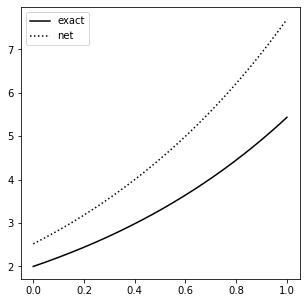

In [46]:
import matplotlib.pyplot as plt
def exact(x):
    return 2*torch.exp(x)
train_x=torch.linspace(a, b, batch_size).view(-1,1)
y_0_train=torch.ones((batch_size,1))*2
y=exact(train_x)
y_net=net(train_x,y_0_train)
plt.figure(figsize=(5, 5))
plt.plot(train_x.detach().numpy(),y.detach().numpy(),'k-',label="exact")
plt.plot(train_x.detach().numpy(),y_net.detach().numpy(),'k:',label="net") 
plt.legend ()